In [1]:
import pandas as pd
import wandb
from itertools import chain

api = wandb.Api()
#sweep = api.sweep("chryu/foundry/sweeps/fvhjp0xv")
sweep1 = api.sweep("chryu/foundry/sweeps/xpqljmz9")


summary_list, config_list, name_list, media_list = [], [], [], []
for run in iter(sweep1.runs):
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    for file in run.files():
        if file.name.startswith('media/plotly/samples'):
            file.download(exist_ok=True)
            media_list.append(file.name)


In [2]:
config = pd.DataFrame(config_list)
summary = pd.DataFrame(summary_list)
media = pd.DataFrame(media_list, columns=['media_path'])
#df = pd.concat((config, summary['avg_variance'], media), axis=1)
df = pd.concat((config, media), axis=1)
df.head()

,seed,dataset,denoiser,dataset.dim,denoiser.model,denoiser.net_depth,denoiser.net_width,denoiser.batch_size,denoiser.iterations,num_visualize_values,dataset.test_data_size,denoiser.base_channels,dataset.sequence_length,dataset.train_data_size,denoiser.num_downsample,denoiser.diffusion_steps,denoiser.from_checkpoint,media_path
0,42,two_delta_sequence,learned,1,mlp,5,128,64,5000,32,64,128,128,64,4,50,False,media/plotly/samples_4999_a22bd2bfef379277929b...
1,42,two_delta_sequence,learned,1,mlp,5,64,64,5000,32,64,128,128,64,4,50,False,media/plotly/samples_4999_6ec8230a6aba073a97ac...
2,42,two_delta_sequence,learned,1,mlp,5,32,64,5000,32,64,128,128,64,4,50,False,media/plotly/samples_4999_97afcc906912af805f1c...
3,42,two_delta_sequence,learned,1,mlp,5,16,64,5000,32,64,128,128,64,4,50,False,media/plotly/samples_4999_3e52af2763986c9ac03b...
4,42,two_delta_sequence,learned,1,mlp,5,8,64,5000,32,64,128,128,64,4,50,False,media/plotly/samples_4999_a057297b278e48ef551b...


In [3]:
df = df[['denoiser.net_depth', 'denoiser.net_width', 'dataset.sequence_length', 'media_path']]
df.head()

,denoiser.net_depth,denoiser.net_width,dataset.sequence_length,media_path
0,5,128,128,media/plotly/samples_4999_a22bd2bfef379277929b...
1,5,64,128,media/plotly/samples_4999_6ec8230a6aba073a97ac...
2,5,32,128,media/plotly/samples_4999_97afcc906912af805f1c...
3,5,16,128,media/plotly/samples_4999_3e52af2763986c9ac03b...
4,5,8,128,media/plotly/samples_4999_a057297b278e48ef551b...


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import json

def plot_media_grid(df, depth):
    df_net_depth = df.loc[df['denoiser.net_depth']==depth].drop(columns=['denoiser.net_depth'])
    df_net_depth = df_net_depth.pivot(index='denoiser.net_width', columns='dataset.sequence_length', values='media_path')
    rows, cols = df_net_depth.shape
    row_titles = [f"width={w}" for w in df_net_depth.index]
    column_titles = [f"seq_len={d}" for d in df_net_depth.columns]
    fig = make_subplots(rows=rows, cols=cols, row_titles=row_titles,
                        horizontal_spacing = 0.01, vertical_spacing=0.01,
                        column_titles=column_titles, shared_xaxes=True, shared_yaxes=True)
    fig.update_layout(title_text=f"net_depth = {depth}")
    for i in range(1,rows+1):
        for j in range(1,cols+1):
            path = df_net_depth.iloc[i-1].iloc[j-1]
            if pd.isna(path):
                continue
            subfig = pio.read_json(path)
            subfig = subfig.update_traces(marker=dict(size=2))
            for k in range(0,len(subfig.data),len(subfig.data)//5 + 1):
                fig.add_trace(subfig.data[k], row=i, col=j)
    fig.for_each_annotation(lambda a: a.update(x = -0.03, textangle=-90) \
            if a.text in row_titles else ())
    return fig
plot_media_grid(df, 5).show(renderer="browser")

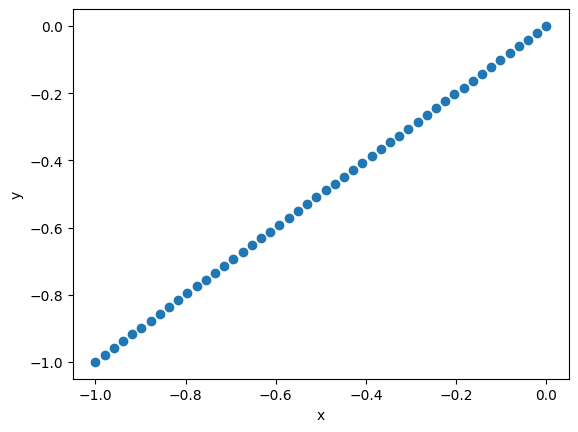

In [17]:
import numpy as np
x = np.linspace(-1,0,50)
y1 = x
y2 = x+1
y = np.concatenate([y1[:25], y2[25:]])
y = x
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

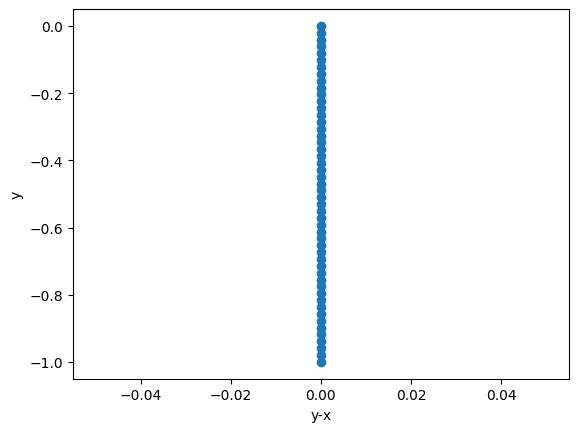

In [18]:
plt.scatter(y-x,y)
plt.xlabel('y-x')
plt.ylabel('y')
plt.show()